## 1. Project Statement

### Problem Definition  
With the increasing use of mobile messaging, **spam messages** have become a major issue, leading to **fraud, scams, and unnecessary clutter** in users' inboxes. Manually filtering spam is inefficient, and rule-based filtering methods struggle to keep up with evolving spam techniques.  

### Goal of the Project  
The objective of this project is to **develop an effective machine learning model** that can automatically classify SMS messages as **spam or ham (legitimate)**. By comparing various supervised and unsupervised learning models, I aim to build a **high-accuracy spam detection system** that minimizes **false negatives (missed spam)** and **false positives (misclassified ham messages).**  

### Why This Matters?  
- Helps users **avoid phishing scams and fraud**.  
- Reduces **unwanted promotional messages**, improving communication efficiency.  
- Contributes to **safer and more secure mobile messaging platforms**.  

 **Through this project, I will explore feature engineering, clustering, classification models, and evaluation metrics to identify some effective spam detection approaches.**


### Data Source:
T. Almeida and J. Hidalgo. "SMS Spam Collection," UCI Machine Learning Repository, 2011. [Online]. Available: https://doi.org/10.24432/C5CC84.



In [58]:

#pip install scikit-learn


import pandas as pd
import re
import string
import nltk
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/lauriezeng/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## 2. Load the Data

In [59]:
df = pd.read_csv(
    'SMSSpamCollection',
    sep='\t',
    header=None,
    names=['label', 'message'],
    engine='python',
    quoting=3,  # Ignore quotes
    on_bad_lines="skip"  # Skip lines with errors
)


## 3. Data Prep

In [63]:
df.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [18]:
# Step 1: Text Cleaning & Preprocessing
def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return " ".join(tokens)

df['clean_message'] = df['message'].apply(clean_text)

In [19]:
! pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# Step 2: Convert text to TF-IDF features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_message'])
y = df['label']

# Step 3: Train/Test Split
# Split original imbalanced data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## 4. EDA

### 4.1 Data Overview

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   label          5574 non-null   object
 1   message        5574 non-null   object
 2   clean_message  5574 non-null   object
dtypes: object(3)
memory usage: 130.8+ KB


There are 5574 entries in the dataset, and there is no missing data.

Dataset Overview:
  label                                            message  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                                       clean_message  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry 2 wkly comp win fa cup final tkts 2...  
3                u dun say early hor u c already say  
4        nah dont think goes usf lives around though  

Class Distribution:
label
ham     4827
spam     747
Name: count, dtype: int64


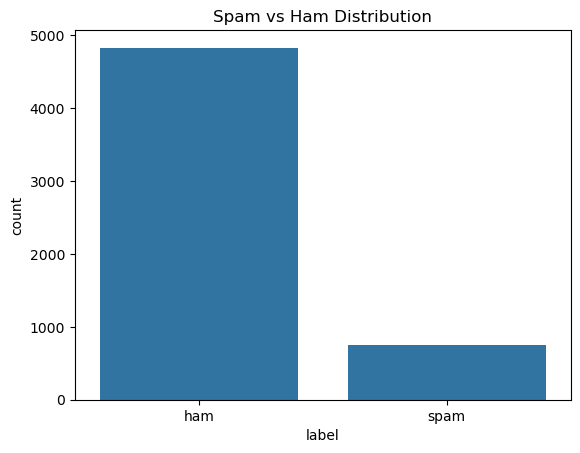

In [21]:
# Data Exploration
print("Dataset Overview:")
print(df.head())
print("\nClass Distribution:")
print(df['label'].value_counts())

# Visualizing class distribution
sns.countplot(x=df['label'])
plt.title("Spam vs Ham Distribution")
plt.show()

The "ham" class has a significantly higher count compared to the "spam" class.
This indicates that the dataset contains more non-spam messages (ham) than spam messages.

#### 4.2 Text Length 

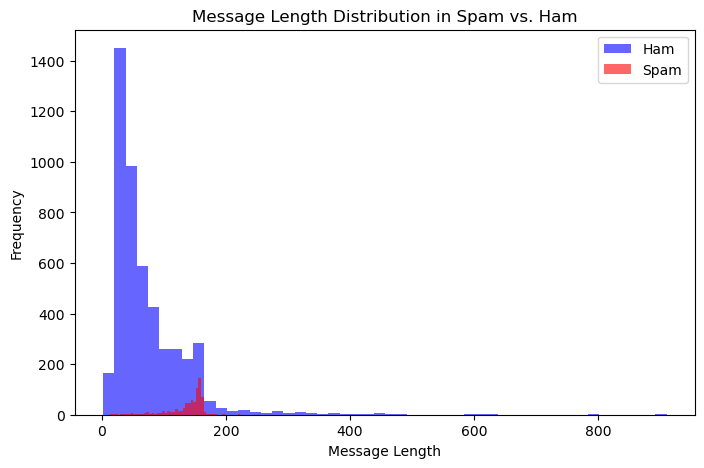

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate message lengths
df['message_length'] = df['message'].apply(len)

# Convert to NumPy arrays for faster processing
ham_lengths = np.array(df[df['label'] == 'ham']['message_length'])
spam_lengths = np.array(df[df['label'] == 'spam']['message_length'])

# Create histogram
plt.figure(figsize=(8, 5))
plt.hist(ham_lengths, bins=50, color='blue', alpha=0.6, label="Ham")
plt.hist(spam_lengths, bins=50, color='red', alpha=0.6, label="Spam")

# Labels and title
plt.legend()
plt.title("Message Length Distribution in Spam vs. Ham")
plt.xlabel("Message Length")
plt.ylabel("Frequency")

# Show plot
plt.show()


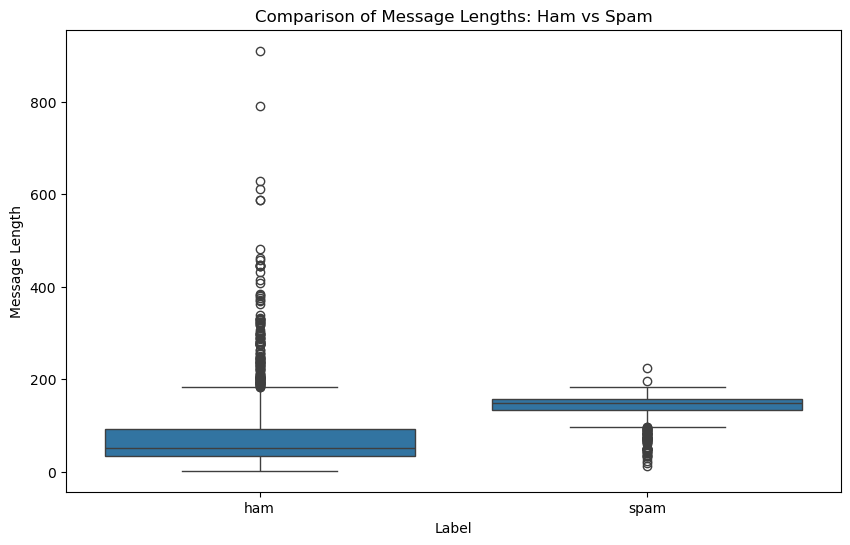

In [23]:
# Create a box plot to compare the length distributions of ham and spam texts
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='message_length', data=df)
plt.title('Comparison of Message Lengths: Ham vs Spam')
plt.xlabel('Label')
plt.ylabel('Message Length')
plt.show()

- The median message length of spam messages is higher than ham messages.
- Spam messages seem to have a narrower interquartile range (IQR), meaning they are more consistent in length.
- Spam messages have some outliers, but far fewer compared to ham messages.This indicates spam messages are typically within a certain length range, likely because they are often templated marketing messages.

#### 4.3 Wordcloud

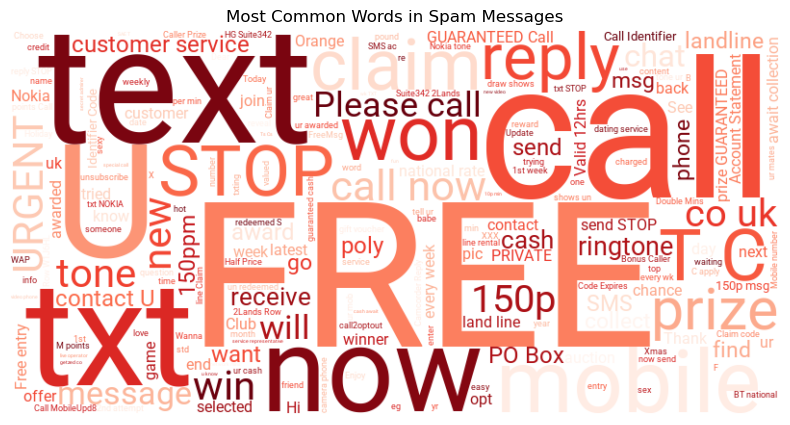

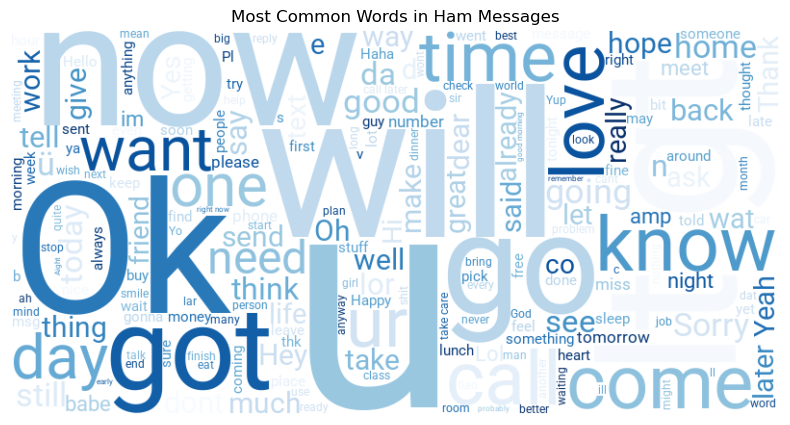

In [24]:
#!pip install wordcloud

#pip install --upgrade "pillow==9.5.0"

from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_path = "/Users/lauriezeng/Downloads/Roboto/static/Roboto-Regular.ttf" #"/System/Library/Fonts/Supplemental/Arial.ttf"

# Function to generate word clouds
def plot_wordcloud(label, color):
    text = " ".join(df[df['label'] == label]['message'])  # Join messages into one text

    # Generate WordCloud (Fixed line)
    wordcloud = WordCloud(width=800, height=400, background_color="white", colormap=color, font_path=font_path).generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Most Common Words in {'Spam' if label == 'spam' else 'Ham'} Messages")
    plt.show()

# Plot Word Clouds
plot_wordcloud('spam', "Reds")  # Spam
plot_wordcloud('ham', "Blues")  # Ham


- From the wordclouds above,we can see the high frequency words in spam text and non-spam text.
- The spam word cloud shows that spam messages frequently use urgent and promotional words like "FREE," "txt," "call," "prize," "won," "claim," and "URGENT." These words indicate a strong focus on enticing users with rewards, prompting immediate action, and often include instructions to "stop" or "reply"—likely to bypass spam filters.
- On the other hand, the ham word cloud contains more conversational and personal words like "ok," "time," "know," "love," "going," "want," "see," and "day." These words suggest more casual, everyday communication, with a mix of questions, planning, and social interactions. Unlike spam, ham messages lack urgency-driven words and promotional offers.


#### 4.4 N-Gram analysis

In [25]:

from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, ngram_range=(2,2), n=10):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]
    return words_freq

# Get common bigrams in spam
spam_bigrams = get_top_ngrams(df[df['label'] == 'spam']['message'])
print("Top Bigrams in Spam:", spam_bigrams)

# Get common trigrams in spam
spam_trigrams = get_top_ngrams(df[df['label'] == 'spam']['message'], ngram_range=(3,3))
print("Top Trigrams in Spam:", spam_trigrams)




Top Bigrams in Spam: [('po box', 27), ('1000 cash', 23), ('prize guaranteed', 22), ('send stop', 21), ('national rate', 20), ('selected receive', 19), ('await collection', 19), ('urgent mobile', 18), ('land line', 18), ('customer service', 17)]
Top Trigrams in Spam: [('draw shows won', 15), ('suite342 2lands row', 15), ('land line claim', 14), ('private 2003 account', 13), ('2003 account statement', 13), ('guaranteed 1000 cash', 12), ('shows 800 redeemed', 12), ('800 redeemed points', 12), ('bonus caller prize', 11), ('urgent trying contact', 11)]


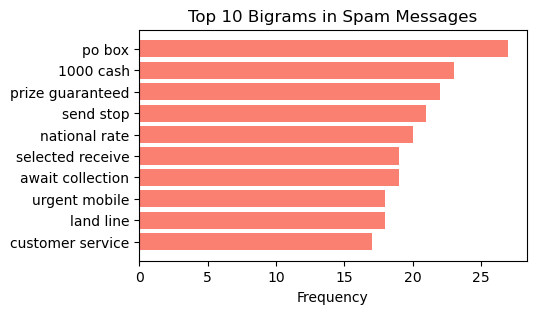

In [26]:
import matplotlib.pyplot as plt

# Extract bigrams and their frequencies
bigrams, frequencies = zip(*spam_bigrams)

# Create a bar plot
plt.figure(figsize=(5, 3))
plt.barh(bigrams, frequencies, color='salmon')
plt.xlabel('Frequency')
plt.title('Top 10 Bigrams in Spam Messages')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top
plt.show()

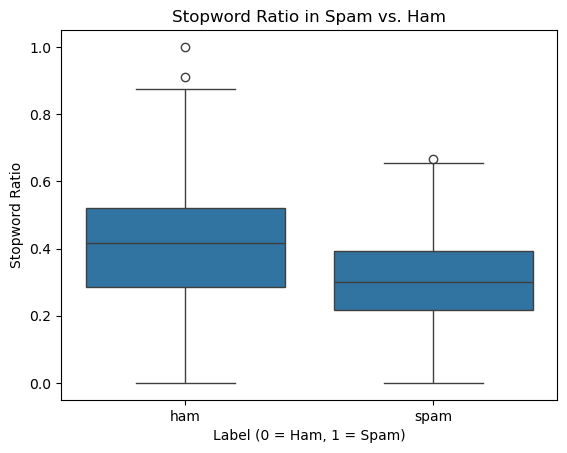

In [27]:

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

df['unique_word_count'] = df['message'].apply(lambda x: len(set(x.split())))

# Check Stopword Proportion in Spam vs. Ham
df['stopword_ratio'] = df['message'].apply(lambda x: sum(1 for word in x.split() if word.lower() in ENGLISH_STOP_WORDS) / len(x.split()))

sns.boxplot(x=df['label'], y=df['stopword_ratio'])
plt.title("Stopword Ratio in Spam vs. Ham")
plt.xlabel("Label (0 = Ham, 1 = Spam)")
plt.ylabel("Stopword Ratio")
plt.show()


- Ham messages contain a higher stopword ratio on average, with greater variability, while spam messages use fewer stopwords and are more consistent in structure. 
- This suggests that spam messages are more direct and keyword-driven, while ham messages resemble natural, conversational text.

## 5. Data Modeling

### 5.1 Supervised Learning

#### Logistic Regression model

In [32]:
from sklearn.metrics import accuracy_score, classification_report

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate Model Performance
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print(report)

Model Accuracy: 0.95
              precision    recall  f1-score   support

         ham       0.95      0.99      0.97       954
        spam       0.95      0.71      0.81       161

    accuracy                           0.95      1115
   macro avg       0.95      0.85      0.89      1115
weighted avg       0.95      0.95      0.95      1115



- The Logistic Regression model achieves 95% accuracy, but it struggles with spam detection (recall = 0.71), meaning it misses many actual spam messages (29% are missied!!). 
- The high recall for ham (0.99) suggests the model is biased towards classifying messages as ham, leading to false negatives in spam classification. Improving recall for spam is necessary, possibly by handling class imbalance or using a more complex model.

#### Random Forest Classifier model

In [33]:
# Train a Random Forest Classifier model

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Model Performance
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Random Forest Model Accuracy: {accuracy:.2f}")
print(report)

Random Forest Model Accuracy: 0.97
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       954
        spam       1.00      0.82      0.90       161

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



- The Random Forest model outperforms the Logistic Regression model with 97% accuracy and stronger recall for spam (0.82 vs. 0.71).
- The precision for spam (1.00) indicates it rarely misclassifies ham as spam, but it still misses 18% of actual spam messages (recall = 0.82). This model is more balanced, but further improving recall for spam

#### SVM 

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=42) 
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate Model Performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print(f"SVM Model Accuracy: {accuracy_svm:.2f}")
print(report_svm)


SVM Model Accuracy: 0.98
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       954
        spam       0.97      0.88      0.92       161

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115



The SVM model performs the best so far, achieving 98% accuracy with a high precision (0.97) and recall (0.88) for spam detection. Compared to previous models, SVM improves spam recall, meaning it catches more actual spam messages (88%) while still maintaining high precision (few false positives).

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.2f}")

# Train the SVM model with the best parameters
best_svm_model = SVC(**best_params)
best_svm_model.fit(X_train, y_train)

# Evaluate the tuned model
y_pred_best_svm = best_svm_model.predict(X_test)
accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)
report_best_svm = classification_report(y_test, y_pred_best_svm)

print(f"Tuned SVM Model Accuracy: {accuracy_best_svm:.2f}")
print(report_best_svm)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Score: 0.98
Tuned SVM Model Accuracy: 0.98
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       954
        spam       0.97      0.88      0.93       161

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



#### XGBoost

In [ ]:
#! pip install xgboost


19409.15s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [38]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train_encoded)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Convert predictions back to original labels (optional)
y_pred_xgb_labels = label_encoder.inverse_transform(y_pred_xgb)

# Evaluate Model Performance
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
report_xgb = classification_report(y_test_encoded, y_pred_xgb)

print(f"XGBoost Model Accuracy: {accuracy_xgb:.2f}")
print(report_xgb)


/Users/lauriezeng/opt/anaconda3/envs/ml2_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:57:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       954
           1       0.96      0.85      0.90       161

    accuracy                           0.97      1115
   macro avg       0.97      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115



To summarize the findings after tuning the models:

1. **Logistic Regression Model**:
    - Accuracy: 95%
    - Struggles with spam detection (recall = 0.71), meaning it misses many actual spam messages.
    - High recall for ham (0.99) suggests the model is biased towards classifying messages as ham.

2. **Random Forest Classifier Model**:
    - Accuracy: 97%
    - Stronger recall for spam (0.82) compared to Logistic Regression.
    - Precision for spam (1.00) indicates it rarely misclassifies ham as spam, but still misses 18% of actual spam messages.

3. **SVM Model**:
    - Accuracy: 98%
    - High precision (0.97) and recall (0.88) for spam detection.
    - Best performance among the models tested so far.

4. **Tuned SVM Model**:
    - Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
    - Best Cross-Validation Score: 0.98
    - Accuracy: 98%
    - High precision (0.97) and recall (0.88) for spam detection.
    - Maintains high performance with improved parameter tuning.

5. **XGBoost Model**:
    - Accuracy: 97%
    - High precision (0.96) and recall (0.85) for spam detection.
    - Performs well but slightly lower recall for spam compared to the SVM model.

Overall, the **SVM model** with tuned parameters performs the best, achieving high accuracy, precision, and recall for spam detection.

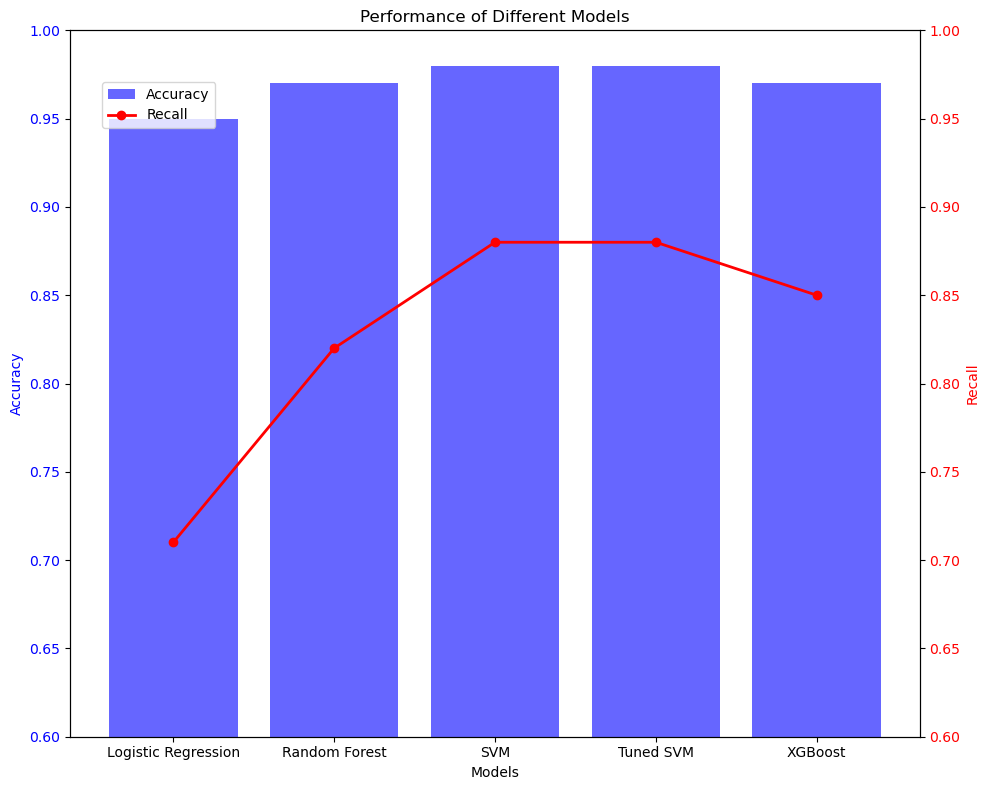

In [42]:
import matplotlib.pyplot as plt

# Model names and their corresponding accuracy and recall scores
model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Tuned SVM', 'XGBoost']
accuracy_scores = [0.95, 0.97, 0.98, 0.98, 0.97]
recall_scores = [0.71, 0.82, 0.88, 0.88, 0.85]

# Create a figure with two subplots
fig, ax1 = plt.subplots(figsize=(10, 8))

# Plot accuracy scores
ax1.bar(model_names, accuracy_scores, color='b', alpha=0.6, label='Accuracy')
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy', color='b')
ax1.set_ylim(0.6, 1.0)  # Set y-axis limits for better visualization
ax1.tick_params(axis='y', labelcolor='b')

# Create another y-axis for recall scores
ax2 = ax1.twinx()
ax2.plot(model_names, recall_scores, color='r', marker='o', linestyle='-', linewidth=2, label='Recall')
ax2.set_ylabel('Recall', color='r')
ax2.set_ylim(0.6, 1.0)  # Set y-axis limits for better visualization
ax2.tick_params(axis='y', labelcolor='r')

# Add title and legend
plt.title('Performance of Different Models')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.show()

In [43]:
print(model_names)


['Logistic Regression', 'Random Forest', 'SVM', 'Tuned SVM', 'XGBoost']


### 5.2 Unsupervised learning

#### KMeans

In [46]:
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_score


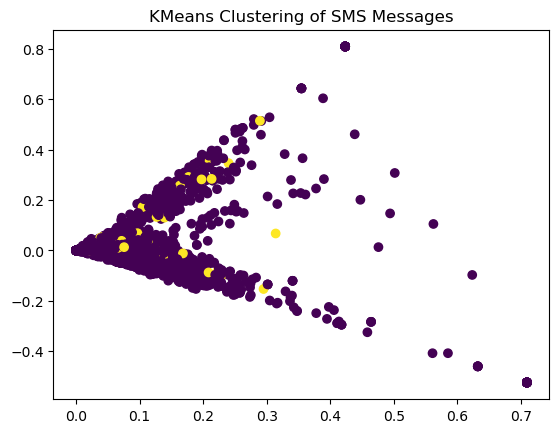

Silhouette Score: 0.00


In [47]:

num_clusters = 2  #  two groups (Spam & Ham)
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Dimensionality Reduction for Visualization
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("KMeans Clustering of SMS Messages")
plt.show()

#Evaluate Clustering Performance
silhouette = silhouette_score(X, kmeans_labels)
print(f"Silhouette Score: {silhouette:.2f}")

The silhouette Score of 0.00 suggests that the clusters found by K-Means do not exhibit clear separation, meaning the clustering model is likely ineffective in distinguishing between spam and non-spam messages. 

#### PCA

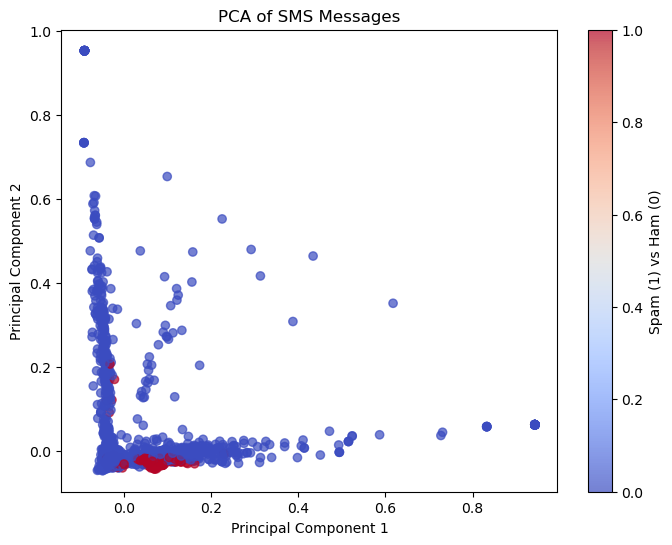

Explained Variance Ratio: [0.00915114 0.00879579]


In [48]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Convert labels to numeric if not already done
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())  # Convert sparse matrix to dense

# Scatter plot of PCA results
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['label'], cmap='coolwarm', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of SMS Messages")
plt.colorbar(label="Spam (1) vs Ham (0)")
plt.show()

# Explained variance ratio
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")




The first two principal components explain less than 2% of the variance in the dataset ([0.00915114, 0.00879579]).
This suggests that PCA is not effectively capturing the structure of the SMS data, likely because text features are high-dimensional and sparse.


The points representing spam (red) and ham (blue) are mostly overlapping, meaning PCA does not clearly separate the two classes.
This suggests that linear transformations (PCA) might not be the best approach for feature reduction in this case.

#### KMean+ PCA

Silhouette Score with PCA: 0.1345


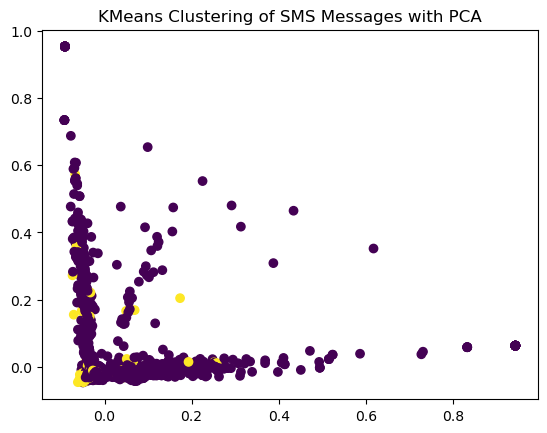

In [50]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions before K-Means
pca = PCA(n_components=50)  # Experiment with different values
X_pca = pca.fit_transform(X.toarray())

# Perform KMeans clustering on reduced data
kmeans_pca = KMeans(n_clusters=2, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca)

# Evaluate Clustering Performance
silhouette_pca = silhouette_score(X_pca, labels_pca)
print(f"Silhouette Score with PCA: {silhouette_pca:.4f}")

# Visualize Clustering Results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, cmap='viridis')
plt.title("KMeans Clustering of SMS Messages with PCA")
plt.show()

- The Silhouette Score suggests that the clusters formed by K-Means have some structure, but the separation is not very strong.
- It tells that K-mean and PCA are not good methods for this case.


#### Hierarchical Clustering

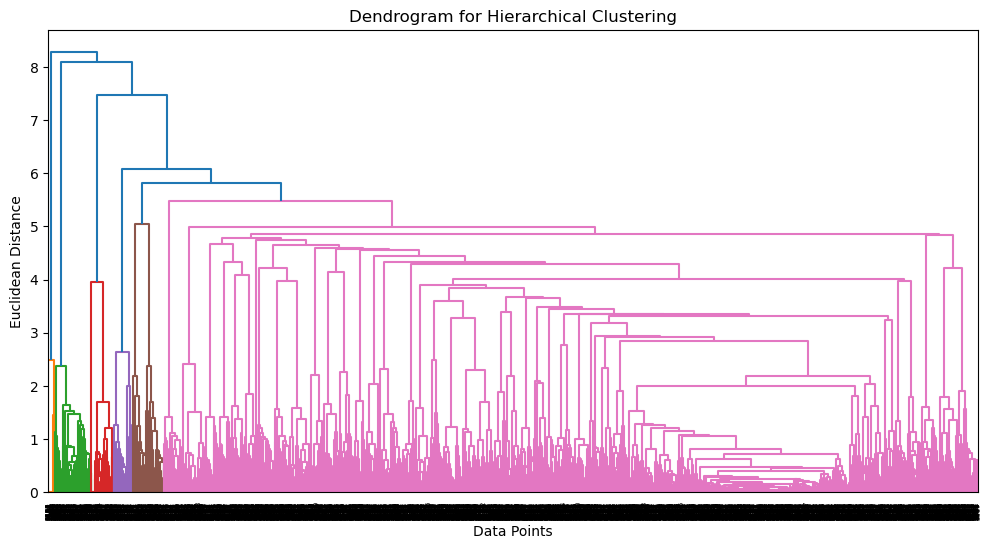

In [ ]:

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Reduce dimensions using PCA 
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_tfidf.toarray())

# Plot the Dendrogram
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(X_pca, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


In [55]:
hc = AgglomerativeClustering(n_clusters=3, metric='cosine', linkage='average')
labels_hc = hc.fit_predict(X_pca)
silhouette_hc = silhouette_score(X_pca, labels_hc)
print(f"Silhouette Score with Cosine Similarity: {silhouette_hc:.4f}")


Silhouette Score with Cosine Similarity: 0.1774


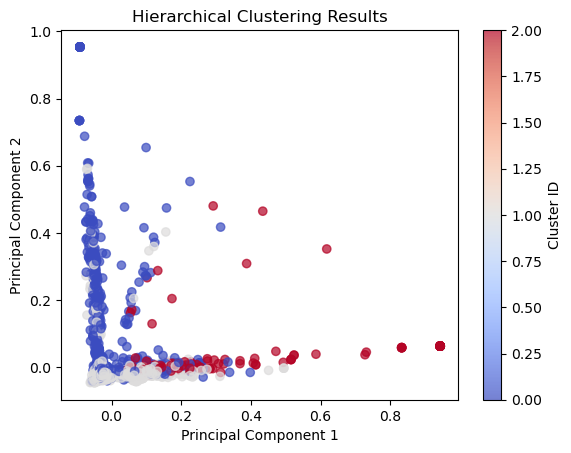

In [ ]:
#visualizing it
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_hc, cmap='coolwarm', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Hierarchical Clustering Results")
plt.colorbar(label="Cluster ID")
plt.show()


Silhouette Score of 0.1011 suggests that the clusters are not very well separated. 

#### LDA (Latent Dirichlet Allocation)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Apply TF-IDF again to extract word features
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_lda = vectorizer.fit_transform(df['clean_message'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda_topics = lda.fit_transform(X_lda)

# Print top words per topic
words = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    print(f"Topic {i}: ", [words[i] for i in topic.argsort()[-10:]])


Topic 0:  ['got', 'lor', 'know', 'like', 'later', 'im', 'sorry', 'ltgt', 'ill', 'ok']
Topic 1:  ['dear', 'going', 'day', 'love', 'dont', 'time', 'im', 'home', 'good', 'come']


In [ ]:
lda = LatentDirichletAllocation(n_components=4, random_state=42)

lda_topics = lda.fit_transform(X_lda)

# Print top words per topic
words = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    print(f"Topic {i}: ", [words[i] for i in topic.argsort()[-10:]])
df['lda_topic'] = lda_topics.argmax(axis=1)
print(df[['message', 'lda_topic']].head(15))


Topic 0:  ['right', 'like', 'meeting', 'send', 'text', 'im', 'free', 'sorry', 'later', 'ill']
Topic 1:  ['na', 'way', 'claim', 'pick', 'dear', 'pls', 'going', 'message', 'prize', 'wat']
Topic 2:  ['babe', 'happy', 'hi', 'ur', 'buy', 'home', 'lol', 'got', 'day', 'im']
Topic 3:  ['want', 'lor', 'night', 'know', 'time', 'dont', 'im', 'ltgt', 'come', 'ok']
                                              message  lda_topic
0   Go until jurong point, crazy.. Available only ...          0
1                       Ok lar... Joking wif u oni...          3
2   Free entry in 2 a wkly comp to win FA Cup fina...          3
3   U dun say so early hor... U c already then say...          2
4   Nah I don't think he goes to usf, he lives aro...          2
5   FreeMsg Hey there darling it's been 3 week's n...          0
6   Even my brother is not like to speak with me. ...          0
7   As per your request 'Melle Melle (Oru Minnamin...          1
8   WINNER!! As a valued network customer you have...       


- Topic 0 & 1 contain possible spam messages:

"WINNER!! As a valued network customer you have..." (Topic 1)
"Free entry in 2 a wkly comp to win FA Cup fina..." (Topic 3)
"FreeMsg Hey there darling it's been 3 week's n..." (Topic 0)
"Had your mobile 11 months or more? U R entitle..." (Topic 0)
These messages contain "WINNER," "Free," "Claim," "Prize," which are common in spam.

- Topic 2 & 3 seem to contain more casual conversations:

"U dun say so early hor... U c already then say..." (Topic 2)
"Nah I don't think he goes to usf, he lives aro..." (Topic 2)
"Ok lar... Joking wif u oni..." (Topic 3)

In [ ]:
# check if spam messages are mostly grouped into one topic
df.groupby('lda_topic')['label'].value_counts(normalize=True)


lda_topic  label
0          0        0.830723
           1        0.169277
1          0        0.812024
           1        0.187976
2          0        0.866033
           1        0.133967
3          0        0.924538
           1        0.075462
Name: proportion, dtype: float64

- Topic 3 is dominated by ham messages (92.5%), meaning it likely represents casual or non-promotional conversations.
- Spam is not concentrated in a single topic, but Topics 0 & 1 have the highest spam presence.

In [ ]:
lda = LatentDirichletAllocation(n_components=6, random_state=42)

In [ ]:

lda_topics = lda.fit_transform(X_lda)
# Print top words per topic
words = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    print(f"Topic {i}: ", [words[i] for i in topic.argsort()[-10:]])
df['lda_topic'] = lda_topics.argmax(axis=1)
print(df[['message', 'lda_topic']].head(15))

Topic 0:  ['sir', 'new', 'meeting', 'waiting', 'like', 'oh', 'free', 'later', 'sorry', 'ill']
Topic 1:  ['2000', 'happen', 'okie', 'guaranteed', 'mobile', 'da', 'wat', 'customer', 'claim', 'prize']
Topic 2:  ['special', 'lol', 'new', 'free', 'ur', 'looking', 'fine', 'like', 'got', 'dun']
Topic 3:  ['home', 'im', 'ur', 'dont', 'yup', 'need', 'time', 'come', 'lor', 'ok']
Topic 4:  ['yo', 'know', 'account', 'happy', 'love', 'ur', 'birthday', 'day', 'im', 'good']
Topic 5:  ['ill', 'way', 'dont', 'hi', 'know', 'going', 'home', 'want', 'ltgt', 'im']
                                              message  lda_topic
0   Go until jurong point, crazy.. Available only ...          3
1                       Ok lar... Joking wif u oni...          3
2   Free entry in 2 a wkly comp to win FA Cup fina...          3
3   U dun say so early hor... U c already then say...          2
4   Nah I don't think he goes to usf, he lives aro...          5
5   FreeMsg Hey there darling it's been 3 week's n...       

In [ ]:
df.groupby('lda_topic')['label'].value_counts(normalize=True)

lda_topic  label
0          0        0.796690
           1        0.203310
1          0        0.723404
           1        0.276596
2          0        0.771791
           1        0.228209
3          0        0.923354
           1        0.076646
4          0        0.865583
           1        0.134417
5          0        0.962640
           1        0.037360
Name: proportion, dtype: float64

Some topics are highly skewed towards ham (e.g., topic 5 has 96% ham and only 3.7% spam).
Some topics have a more mixed distribution (e.g., topic 1 has 72% ham and 27% spam).
Topic 3 is highly dominated by ham (92%), meaning spam messages rarely fall into this category.

LDA successfully separates some topics based on spam likelihood, but not all topics are cleanly split.
Spam-heavy topics (higher spam proportion) might be used to detect spam more effectively.
Adding more topics or refining text preprocessing (e.g., removing stopwords) could improve topic separation.

#### NMF

In [ ]:
from sklearn.decomposition import NMF

# Apply TF-IDF (same as before)
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_nmf = vectorizer.fit_transform(df['clean_message'])

# Apply NMF for topic modeling
nmf = NMF(n_components=4, random_state=42)  # Using 4 topics to match LDA
nmf_topics = nmf.fit_transform(X_nmf)

# Print top words per topic
words = vectorizer.get_feature_names_out()
for i, topic in enumerate(nmf.components_):
    print(f"Topic {i}: ", [words[j] for j in topic.argsort()[-10:]])

# Assign the dominant topic to each message
df['nmf_topic'] = nmf_topics.argmax(axis=1)

# Check topic distribution across spam and ham
df.groupby('nmf_topic')['label'].value_counts(normalize=True)


Topic 0:  ['ask', 'wat', 'wan', 'leave', 'said', 'prob', 'yup', 'thanx', 'lor', 'ok']
Topic 1:  ['help', 'meet', 'tonight', 'text', 'yeah', 'aight', 'meeting', 'sorry', 'later', 'ill']
Topic 2:  ['like', 'got', 'want', 'ur', 'time', 'know', 'good', 'dont', 'ltgt', 'come']
Topic 3:  ['babe', 'coming', 'gon', 'way', 'lor', 'work', 'na', 'going', 'home', 'im']


nmf_topic  label
0          0        0.984802
           1        0.015198
1          0        0.994118
           1        0.005882
2          0        0.822927
           1        0.177073
3          0        0.982609
           1        0.017391
Name: proportion, dtype: float64

Unlike LDA, which had spam spread across multiple topics, NMF has grouped more spam into a single topic (Topic 2).
This suggests that NMF is separating spam and ham messages better than LDA.

#### DBSCAN

Silhouette Score with DBSCAN: 0.4495


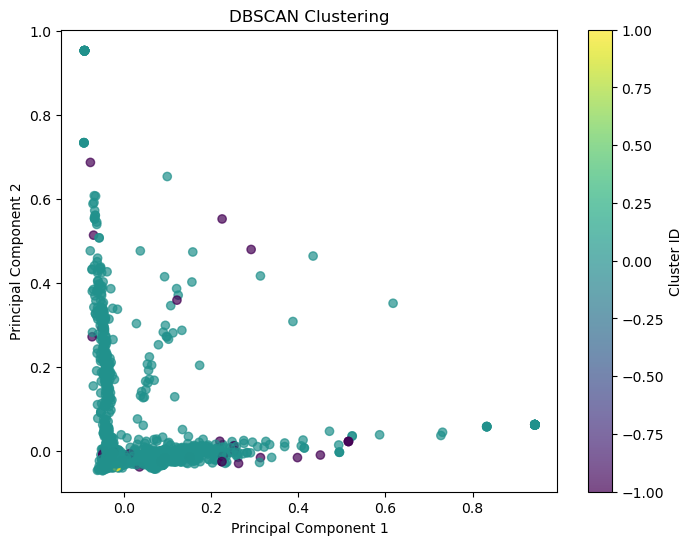

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Reduce dimensionality using PCA before clustering
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X.toarray())

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_pca)

# Evaluate with Silhouette Score
silhouette_dbscan = silhouette_score(X_pca, labels_dbscan)
print(f"Silhouette Score with DBSCAN: {silhouette_dbscan:.4f}")

# Visualize clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_dbscan, cmap='viridis', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("DBSCAN Clustering")
plt.colorbar(label="Cluster ID")
plt.show()



Silhouette Score of 0.4572 suggests that the clusters are not very well separated. DBSCAN detects some outliers but fails to create strong clusters, suggesting that spam and ham messages are not easily separable in this feature space.

## Conclusion

- Clustering methods struggle with SMS spam detection because **spam and ham messages do not form well-separated groups** in high-dimensional space. 
- Traditional clustering algorithms like **K-Means and Hierarchical Clustering rely on Euclidean distance**, which is not ideal for text similarity, as it fails to capture **semantic meaning and context**.
- Additionally, **TF-IDF treats words independently**, making it difficult to identify spam messages that use different phrasing but convey the same intent. The **uneven distribution of spam (minority class) further confuses clustering algorithms**, which try to create balanced clusters. 
- Instead of clustering, **supervised learning methods are better suited for spam detection since they use labeled data for classification. 